In [2]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import pandas as pd

# Prueba inicial

In [89]:
datos_df = pd.read_csv('time_tables/547844/snap_96.csv')
datos_df.head()

,Unnamed: 0,x,y,z,ParticleIDs
0,0,-0.015625,-0.056641,0.182373,117529495303
1,1,-0.066406,-0.142578,-0.027100,122958304653
2,2,0.000977,-0.071289,0.133301,119574225956
3,3,-0.067871,-0.133789,-0.142578,117286018383
4,4,0.096191,0.200195,-0.147217,117199215714


In [3]:
datos_df = pd.read_csv('time_tables/547844/snap_96.csv')
limits_x = [7900,7950]
limits_y = [14800,14850]
limits_z = [3625,3675]
limits_xy = (limits_x,limits_y)
limits_xz = (limits_x,limits_z)
limits_yz = (limits_y,limits_z)

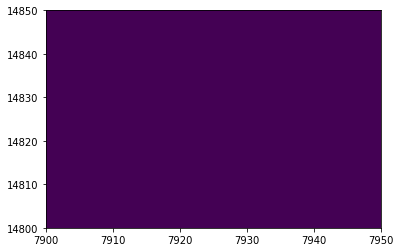

In [4]:
plt.hist2d(datos_df['x'],datos_df['y'],bins=50,range=limits_xy)
plt.show()

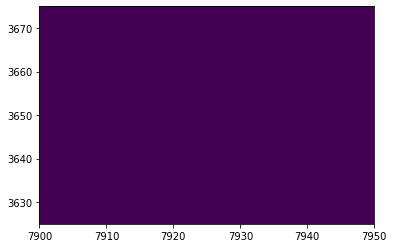

In [6]:
plt.hist2d(datos_df['x'],datos_df['z'],bins=50,range=limits_xz)
plt.show()

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([14800., 14801., 14802., 14803., 14804., 14805., 14806., 14807.,
        14808., 14809., 14810., 14811., 14812., 14813., 14814., 14815.,
        14816., 14817., 14818., 14819., 14820., 14821., 14822., 14823.,
        14824., 14825., 14826., 14827., 14828., 14829., 14830., 14831.,
        14832., 14833., 14834., 14835., 14836., 14837., 14838., 14839.,
        14840., 14841., 14842., 14843., 14844., 14845., 14846., 14847.,
        14848., 14849., 14850.]),
 array([3625., 3626., 3627., 3628., 3629., 3630., 3631., 3632., 3633.,
        3634., 3635., 3636., 3637., 3638., 3639., 3640., 3641., 3642.,
        3643., 3644., 3645., 3646., 3647., 3648., 3649., 3650., 3651.,
        3652., 3653., 3654., 3655., 3656., 3657., 3658., 3659., 3660.,
 

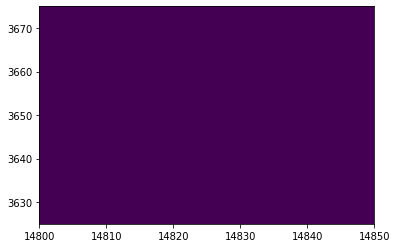

In [7]:
plt.hist2d(datos_df['y'],datos_df['z'],bins=50,range=limits_yz)

In [24]:
subhaloid_list = [ 455291,  478216,  501208,  531910,  547844,  570319, 571633,  582137,  589496,  598112,  606820,  619381,  628949]
R200_list = [ 179.21212769,  167.076828  ,  169.57954407,  146.69950867, 140.94436646,  119.15261841,  123.67668915,  120.26761627, 119.03757477,  111.41501617,  108.23468781,  101.64916229, 97.0650177]

subhaloid = subhaloid_list[0]
R200 = R200_list[0]

limits = {}
limit = R200
limits['x'] = [-limit,limit]
limits['y'] = [-limit,limit]
limits['z'] = [-limit,limit]
limits['xy'] = (limits['x'],limits['y'])
limits['xz'] = (limits['x'],limits['z'])
limits['yz'] = (limits['y'],limits['z'])
for snapshot in range(50,100):
    datos_df = pd.read_csv(f'time_tables/{subhaloid}/snap_{snapshot}.csv')
    plt.hist2d(datos_df['y'],datos_df['z'],bins=100,range=limits_yz)
    plt.savefig(f'time_tables/{subhaloid}/movie/{snapshot}.png')
    plt.clf()
    print('%s realizada'%snapshot,end='>')

50 realizada>51 realizada>52 realizada>53 realizada>54 realizada>55 realizada>56 realizada>57 realizada>58 realizada>59 realizada>60 realizada>61 realizada>62 realizada>63 realizada>64 realizada>65 realizada>66 realizada>67 realizada>68 realizada>69 realizada>70 realizada>71 realizada>72 realizada>73 realizada>74 realizada>75 realizada>76 realizada>77 realizada>78 realizada>79 realizada>80 realizada>81 realizada>82 realizada>83 realizada>84 realizada>85 realizada>86 realizada>87 realizada>88 realizada>89 realizada>90 realizada>91 realizada>92 realizada>93 realizada>94 realizada>95 realizada>96 realizada>97 realizada>98 realizada>99 realizada>

<Figure size 432x288 with 0 Axes>

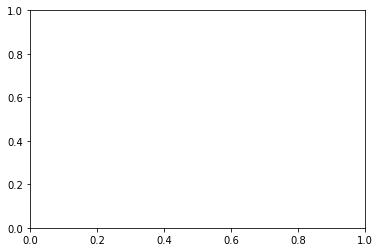

In [14]:
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots()

def counterrotating_density_yz(i):#subhaloid,snapshot,limits,
    snap_start = 65
    datos_df = pd.read_csv(f'time_tables/{subhaloid}/snap_{snap_start + i}.csv')
    ax.hist2d(datos_df['y'],datos_df['z'],bins=100,range=limits['yz'],cmap='inferno')
    ax.set_title(f'Subhalo {subhaloid} Snap {snap_start + i}')
    return(None)

def counterrotating_scatter_yz(i):#subhaloid,snapshot,limits,
    snap_start = 65
    ax.clear()
    datos_df = pd.read_csv(f'time_tables/{subhaloid}/snap_{snap_start + i}.csv')
    ax.scatter(datos_df['y'],datos_df['z'],s=0.1,color='black')
    ax.set_xlim(limits['y'])
    ax.set_ylim(limits['z'])
    ax.set_title(f'Subhalo {subhaloid} Snap {snap_start + i}')
    return(None)

def generate_cr_density_animation(subhaloid,R200,snap_length):
    limits = {}
    limit = 0.5*R200
    limits['x'] = [-limit,limit]
    limits['y'] = [-limit,limit]
    limits['z'] = [-limit,limit]
    limits['xy'] = (limits['x'],limits['y'])
    limits['xz'] = (limits['x'],limits['z'])
    limits['yz'] = (limits['y'],limits['z'])
    anim = FuncAnimation(fig, counterrotating_density_yz, frames=snap_length, interval=200)
    anim.save('animation_density.gif')
    return('DONE')

def generate_cr_scatter_animation(subhaloid,R200,snap_length):
    limits = {}
    limit = 0.5*R200
    limits['x'] = [-limit,limit]
    limits['y'] = [-limit,limit]
    limits['z'] = [-limit,limit]
    limits['xy'] = (limits['x'],limits['y'])
    limits['xz'] = (limits['x'],limits['z'])
    limits['yz'] = (limits['y'],limits['z'])
    anim = FuncAnimation(fig, counterrotating_scatter_yz, frames=snap_length, interval=200)
    anim.save('animation_scatter.gif')
    return('DONE')

#------------------------------------#
subhaloid_list = [ 455291,  478216,  501208,  531910,  547844,  570319, 571633,  582137,  589496,  598112,  606820,  619381,  628949]
R200_list = [ 179.21212769,  167.076828  ,  169.57954407,  146.69950867, 140.94436646,  119.15261841,  123.67668915,  120.26761627, 119.03757477,  111.41501617,  108.23468781,  101.64916229, 97.0650177]

subhaloid = subhaloid_list[0]
R200 = R200_list[0]

limits = {}
limit = 0.5*R200
limits['x'] = [-limit,limit]
limits['y'] = [-limit,limit]
limits['z'] = [-limit,limit]
limits['xy'] = (limits['x'],limits['y'])
limits['xz'] = (limits['x'],limits['z'])
limits['yz'] = (limits['y'],limits['z'])

#--------------------------------------#
#anim = FuncAnimation(fig, counterrotating_scatter_yz, frames=35, interval=200)

#anim.save('animation_scatter.gif')

In [12]:
anim = FuncAnimation(fig, counterrotating_density_yz, frames=35, interval=200)

anim.save('animation_density.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.


'DONE'

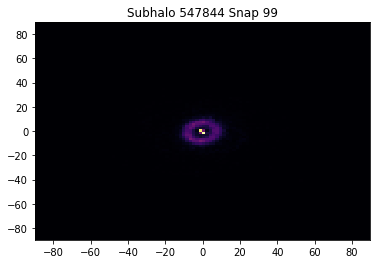

In [13]:
subhaloid_list = [ 455291,  478216,  501208,  531910,  547844,  570319, 571633,  582137,  589496,  598112,  606820,  619381,  628949]
R200_list = [ 179.21212769,  167.076828  ,  169.57954407,  146.69950867, 140.94436646,  119.15261841,  123.67668915,  120.26761627, 119.03757477,  111.41501617,  108.23468781,  101.64916229, 97.0650177]

select = 4
snap_length = 35

subhaloid = subhaloid_list[select]
R200 = R200_list[select]

fig, ax = plt.subplots()
generate_cr_scatter_animation(subhaloid,R200,snap_length)
generate_cr_density_animation(subhaloid,R200,snap_length)

MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.


'DONE'

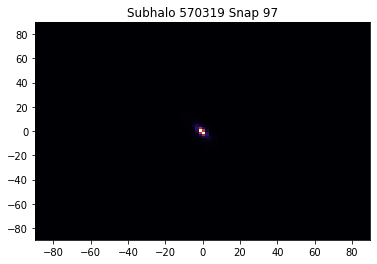

In [19]:
def counterrotating_density_yz(i):#subhaloid,snapshot,limits,
    snap_start = 35
    datos_df = pd.read_csv(f'time_tables/{subhaloid}/snap_{snap_start + i}.csv')
    ax.hist2d(datos_df['y'],datos_df['z'],bins=100,range=limits['yz'],cmap='inferno')
    ax.set_title(f'Subhalo {subhaloid} Snap {snap_start + i}')
    return(None)

def counterrotating_scatter_yz(i):#subhaloid,snapshot,limits,
    snap_start = 35
    ax.clear()
    datos_df = pd.read_csv(f'time_tables/{subhaloid}/snap_{snap_start + i}.csv')
    ax.scatter(datos_df['y'],datos_df['z'],s=0.1,color='black')
    ax.set_xlim(limits['y'])
    ax.set_ylim(limits['z'])
    ax.set_title(f'Subhalo {subhaloid} Snap {snap_start + i}')
    return(None)

def generate_cr_density_animation(subhaloid,R200,snap_length):
    limits = {}
    limit = 0.5*R200
    limits['x'] = [-limit,limit]
    limits['y'] = [-limit,limit]
    limits['z'] = [-limit,limit]
    limits['xy'] = (limits['x'],limits['y'])
    limits['xz'] = (limits['x'],limits['z'])
    limits['yz'] = (limits['y'],limits['z'])
    anim = FuncAnimation(fig, counterrotating_density_yz, frames=snap_length, interval=200)
    anim.save('animation_density.gif')
    return('DONE')

def generate_cr_scatter_animation(subhaloid,R200,snap_length):
    limits = {}
    limit = 0.5*R200
    limits['x'] = [-limit,limit]
    limits['y'] = [-limit,limit]
    limits['z'] = [-limit,limit]
    limits['xy'] = (limits['x'],limits['y'])
    limits['xz'] = (limits['x'],limits['z'])
    limits['yz'] = (limits['y'],limits['z'])
    anim = FuncAnimation(fig, counterrotating_scatter_yz, frames=snap_length, interval=200)
    anim.save('animation_scatter.gif')
    return('DONE')

#------------------------------------#

subhaloid_list = [ 455291,  478216,  501208,  531910,  547844,  570319, 571633,  582137,  589496,  598112,  606820,  619381,  628949]
R200_list = [ 179.21212769,  167.076828  ,  169.57954407,  146.69950867, 140.94436646,  119.15261841,  123.67668915,  120.26761627, 119.03757477,  111.41501617,  108.23468781,  101.64916229, 97.0650177]

select = 5
snap_length = 63

subhaloid = subhaloid_list[select]
R200 = R200_list[select]

fig, ax = plt.subplots()
generate_cr_scatter_animation(subhaloid,R200,snap_length)
generate_cr_density_animation(subhaloid,R200,snap_length)

MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.


'DONE'

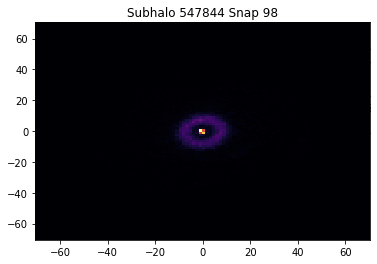

In [86]:
from matplotlib.animation import FuncAnimation
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import pandas as pd

def full_density_yz(i):#subhaloid,snapshot,limits,
    snap_start = 35
    datos_df = pd.read_csv(f'time_tables/{subhaloid}/snap_{snap_start + i}.csv')
    ax.hist2d(datos_df['y'],datos_df['z'],bins=100,range=limits['yz'],cmap='inferno')
    ax.set_title(f'Subhalo {subhaloid} Snap {snap_start + i}')
    return(None)

def full_scatter_yz(i):#subhaloid,snapshot,limits,
    snap_start = 35
    ax.clear()
    datos_df = pd.read_csv(f'time_tables_full/{subhaloid}/snap_{snap_start + i}.csv')
    ax.scatter(datos_df['y'],datos_df['z'],s=0.1,color='black')
    ax.set_xlim(limits['y'])
    ax.set_ylim(limits['z'])
    ax.set_title(f'Subhalo {subhaloid} Snap {snap_start + i}')
    return(None)

def generate_density_animation(subhaloid,R200,snap_length):
    limits = {}
    limit = 0.5*R200
    limits['x'] = [-limit,limit]
    limits['y'] = [-limit,limit]
    limits['z'] = [-limit,limit]
    limits['xy'] = (limits['x'],limits['y'])
    limits['xz'] = (limits['x'],limits['z'])
    limits['yz'] = (limits['y'],limits['z'])
    anim = FuncAnimation(fig, full_density_yz, frames=snap_length, interval=200)
    anim.save('animation_density.gif')
    return('DONE')

def generate_scatter_animation(subhaloid,R200,snap_length):
    limit = 0.5*R200
    limits['x'] = [-limit,limit]
    limits['y'] = [-limit,limit]
    limits['z'] = [-limit,limit]
    limits['xy'] = (limits['x'],limits['y'])
    limits['xz'] = (limits['x'],limits['z'])
    limits['yz'] = (limits['y'],limits['z'])
    anim = FuncAnimation(fig, full_scatter_yz, frames=snap_length, interval=200)
    anim.save('animation_scatter.gif')
    return('DONE')

###########################################################################
subhaloid_list = [ 455291,  478216,  501208,  531910,  547844,  570319, 571633,  582137,  589496,  598112,  606820,  619381,  628949]
R200_list = [ 179.21212769,  167.076828  ,  169.57954407,  146.69950867, 140.94436646,  119.15261841,  123.67668915,  120.26761627, 119.03757477,  111.41501617,  108.23468781,  101.64916229, 97.0650177]

select = 4
snap_length = 64

subhaloid = subhaloid_list[select]
R200 = R200_list[select]

limits = {}

fig, ax = plt.subplots()
generate_scatter_animation(subhaloid,R200,snap_length)
generate_density_animation(subhaloid,R200,snap_length)

# Version con CR vs Total

MovieWriter ffmpeg unavailable; using Pillow instead.


'DONE'

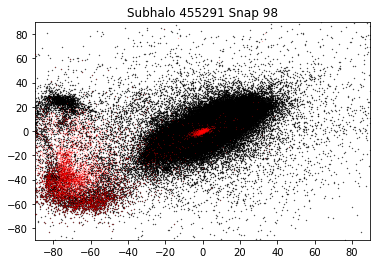

In [14]:
from matplotlib.animation import FuncAnimation
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import pandas as pd

def versus_scatter_yz(i):#subhaloid,snapshot,limits,
    ax.clear()
    datos_df_full = pd.read_csv(f'time_tables_full/{subhaloid}/snap_{snap_start + i}.csv')
    datos_df_cr = pd.read_csv(f'time_tables/{subhaloid}/snap_{snap_start + i}.csv')
    
    
    ax.scatter(datos_df_full['y'],datos_df_full['z'],s=0.1,color='black',zorder=10)
    ax.scatter(datos_df_cr['y'],datos_df_cr['z'],s=0.01,color='red',zorder=20,label='CR particles')
    ax.set_xlim(limits['y'])
    ax.set_ylim(limits['z'])
    ax.set_title(f'Subhalo {subhaloid} Snap {snap_start + i}')
    return(None)

def generate_versus_scatter_animation(subhaloid,R200,snap_length):
    limit = 0.5*R200
    limits['x'] = [-limit,limit]
    limits['y'] = [-limit,limit]
    limits['z'] = [-limit,limit]
    limits['xy'] = (limits['x'],limits['y'])
    limits['xz'] = (limits['x'],limits['z'])
    limits['yz'] = (limits['y'],limits['z'])
    anim = FuncAnimation(fig, versus_scatter_yz, frames=snap_length, interval=200)
    anim.save('animation_scatter.gif',dpi=150)
    return('DONE')

###########################################################################

In [ ]:
subhaloid_list = [ 455291,  478216,  501208,  531910,  547844,  570319, 571633,  582137,  589496,  598112,  606820,  619381,  628949]
R200_list = [ 179.21212769,  167.076828  ,  169.57954407,  146.69950867, 140.94436646,  119.15261841,  123.67668915,  120.26761627, 119.03757477,  111.41501617,  108.23468781,  101.64916229, 97.0650177]

select = 0
snap_start = 35
snap_length = 64

subhaloid = subhaloid_list[select]
R200 = R200_list[select]

limits = {}

fig, ax = plt.subplots()
generate_versus_scatter_animation(subhaloid,R200,snap_length)

# Graficando particulas con respectivo leafSubhaloID en el tiempo

In [ ]:
from matplotlib.animation import FuncAnimation
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import pandas as pd

def versus_scatter_yz(i):#subhaloid,snapshot,limits,
    ax.clear()
    datos_df_full = pd.read_csv(f'time_tables_full/{subhaloid}/snap_{snap_start + i}.csv')
    datos_df_cr = pd.read_csv(f'time_tables/{subhaloid}/snap_{snap_start + i}.csv')
    
    
    ax.scatter(datos_df_full['y'],datos_df_full['z'],s=0.1,color='black',zorder=10)
    ax.scatter(datos_df_cr['y'],datos_df_cr['z'],s=0.01,color='red',zorder=20,label='CR particles')
    ax.set_xlim(limits['y'])
    ax.set_ylim(limits['z'])
    ax.set_title(f'Subhalo {subhaloid} Snap {snap_start + i}')
    return(None)

def generate_versus_scatter_animation(subhaloid,R200,snap_length):
    limit = 0.5*R200
    limits['x'] = [-limit,limit]
    limits['y'] = [-limit,limit]
    limits['z'] = [-limit,limit]
    limits['xy'] = (limits['x'],limits['y'])
    limits['xz'] = (limits['x'],limits['z'])
    limits['yz'] = (limits['y'],limits['z'])
    anim = FuncAnimation(fig, versus_scatter_yz, frames=snap_length, interval=200)
    anim.save('animation_scatter.gif',dpi=150)
    return('DONE')

###########################################################################

In [ ]:
subhaloid_list = [ 455291,  478216,  501208,  531910,  547844,  570319, 571633,  582137,  589496,  598112,  606820,  619381,  628949]
R200_list = [ 179.21212769,  167.076828  ,  169.57954407,  146.69950867, 140.94436646,  119.15261841,  123.67668915,  120.26761627, 119.03757477,  111.41501617,  108.23468781,  101.64916229, 97.0650177]

select = 0
snap_start = 35
snap_length = 64

subhaloid = subhaloid_list[select]
R200 = R200_list[select]

limits = {}

fig, ax = plt.subplots()
generate_versus_scatter_animation(subhaloid,R200,snap_length)